In [1]:
import pandas as pd

data = pd.read_parquet("splunk_agg_data_24-05-05__24-07-23.parquet")

data = data.dropna()

data_subset = data[
    ["request_amount", "error_count"]
]
data_time = data["time"]

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='request_amount'>, <Axes: ylabel='error_count'>],
       dtype=object))

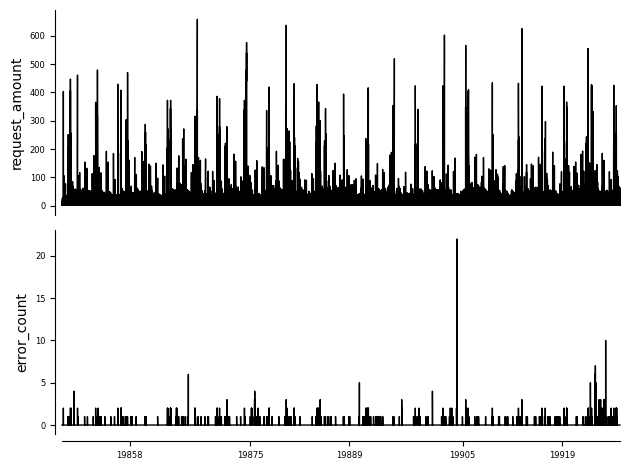

In [2]:
from tigramite import data_processing as pp
from tigramite import plotting as tp

dataframe = pp.DataFrame(data_subset.values, var_names=data_subset.columns, datatime=data_time.values)

tp.plot_timeseries(dataframe)

In [5]:
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests.gsquared import Gsquared

cond_ind_test = Gsquared()
lpcmci = LPCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test, verbosity=1)
tau_max = 10

results = lpcmci.run_lpcmci(tau_max=tau_max)


Starting preliminary phase  1

Starting test phase

p = 0
(1,-1) independent (0, 0) given () union set()
Writing:   (1,-1) oL> (0, 0) ==> (1,-1)     (0, 0) 
(0,-2) independent (1, 0) given () union set()
(1,-2) independent (0, 0) given () union set()
Writing:   (1,-2) oL> (0, 0) ==> (1,-2)     (0, 0) 
Writing:   (0,-2) oL> (1, 0) ==> (0,-2)     (1, 0) 
(0,-3) independent (1, 0) given () union set()
(1,-3) independent (0, 0) given () union set()
Writing:   (1,-3) oL> (0, 0) ==> (1,-3)     (0, 0) 
Writing:   (0,-3) oL> (1, 0) ==> (0,-3)     (1, 0) 
(0,-4) independent (1, 0) given () union set()
(1,-4) independent (0, 0) given () union set()
Writing:   (1,-4) oL> (0, 0) ==> (1,-4)     (0, 0) 
Writing:   (0,-4) oL> (1, 0) ==> (0,-4)     (1, 0) 
(0,-5) independent (1, 0) given () union set()
(1,-5) independent (0, 0) given () union set()
Writing:   (1,-5) oL> (0, 0) ==> (1,-5)     (0, 0) 
Writing:   (0,-5) oL> (1, 0) ==> (0,-5)     (1, 0) 
(0,-6) independent (1, 0) given () union set()
(1,

MemoryError: Unable to allocate 265. PiB for an array with shape (578, 578, 578, 578, 578, 578) and data type int64